# Projeto EDA e Regressão Linear

#### Imports e base

In [576]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

In [577]:
# Criando data frame base
base = pd.read_csv('dados/Ice Cream.csv')
base.sample(3)

,Temperature,Revenue
210,22.4,494
356,24.5,597
102,14.3,323


## Análise exploratória

Verificando valores ausentes ou inconsistentes

In [580]:
# Verificando dados nulos e tipo de dados
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 7.9 KB


Os dados aparecem como int64 e float64, então todos os caracteres são numéricos 

In [582]:
# Estatísticas descritivas da base
base.describe().round(2)

,Temperature,Revenue
count,500.00,500.00
mean,22.28,522.06
std,8.10,175.41
min,0.00,10.00
25%,17.18,406.00
50%,22.40,530.00
75%,27.80,643.00
max,45.00,1000.00


## Visualização de dados

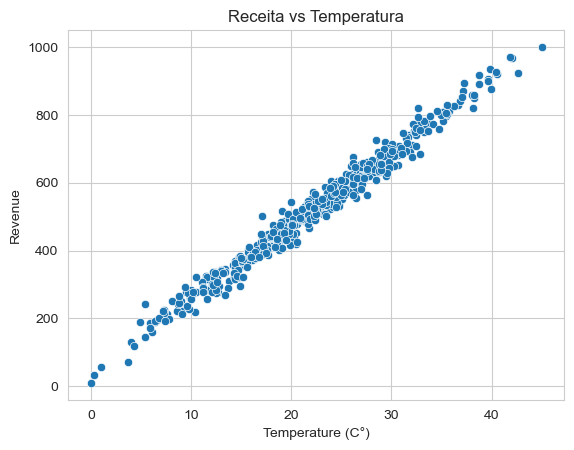

In [584]:
# Criando grafico de relação entre revenue e temperature
sns.scatterplot(data = base, x= base['Temperature'],y= base['Revenue'])
plt.xlabel('Temperature (C°)')
plt.ylabel('Revenue')
plt.title('Receita vs Temperatura')
plt.show()

In [585]:
# Verificando corelação entre as variaves
corr = base['Temperature'].corr(base['Revenue'])
print(f'Corelação entre Temperature e Revenue:  {corr}')

Corelação entre Temperature e Revenue:  0.989840781741682


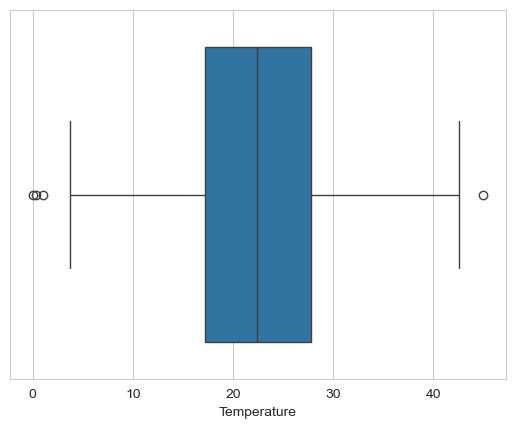

In [586]:
# criando grafico para visualizar outliers
sns.boxplot(x=base['Temperature'])
plt.show()

In [587]:
# Verificando outliers
Q1 = base['Temperature'].quantile(.25)
Q3 = base['Temperature'].quantile(.75)

IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = base[(base['Temperature'] < limite_inferior) | (base['Temperature'] > limite_superior)]
outliers

,Temperature,Revenue
8,1.0,56
371,0.3,33
402,0.0,10
444,45.0,1000


In [588]:
# Dropando outliers 
base = base.drop(outliers.index).reset_index(drop=True)

In [589]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  496 non-null    float64
 1   Revenue      496 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 7.9 KB


In [590]:
# Revendo estatísticas descritivas para ver a diferença com a análise anterior
# Nota: o desvio padrão (STD) diminuiu um pouco e a média (mean) ficou quase igual,
# ótimo sinal, indica que os outliers realmente estavam atrapalhando.
base.describe().round(2)

,Temperature,Revenue
count,496.00,496.00
mean,22.37,524.05
std,7.88,170.59
min,3.70,72.00
25%,17.20,406.75
50%,22.45,531.00
75%,27.80,643.00
max,42.60,970.00


## Modelo: regresão linear

In [592]:
# variável X Independente (Temperature)
X = base[['Temperature']]

# variável y Dependente (Revenue)
y = base['Revenue']

# Separando dados em treino e teste (30% teste, 70% treino)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=77)

In [593]:
# Criando modelo
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Validação

In [595]:
# Predição
y_pred = model.predict(X_test)

In [596]:
# Avaliando modelo
r2 = r2_score(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
RMSE = root_mean_squared_error(y_test, y_pred)

print(f'''
R²: {r2:.2f}
MAE: {MAE:.2f}
RMSE: {RMSE:.2f}
''')


R²: 0.98
MAE: 20.35
RMSE: 25.15



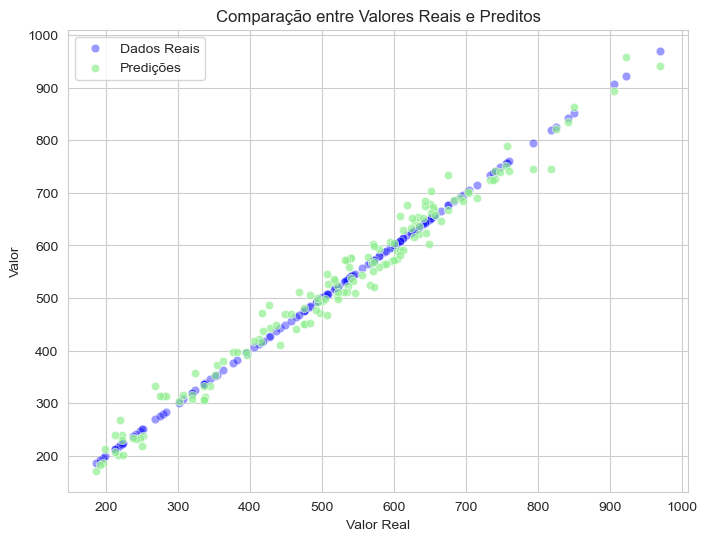

In [597]:
plt.figure(figsize=(8,6))

# Pontos reais em azul (mais claros para ficarem por baixo)
sns.scatterplot(x=y_test, y=y_test, color='blue', alpha=0.4, label='Dados Reais')

# Pontos preditos em verde (mais fortes, por cima)
sns.scatterplot(x=y_test, y=y_pred, color='lightgreen', alpha=0.7, label='Predições')

plt.xlabel('Valor Real')
plt.ylabel('Valor')
plt.title('Comparação entre Valores Reais e Preditos')
plt.legend()
plt.grid(True)
plt.show()